In [2]:
import pandas as pd

In [3]:
import math

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("estonia.csv")

In [21]:
ages = {"Child" : 0, "Adult" : 0}
for i in df["Age"]:
    if i > 18:
        ages["Adult"] += 1
    else:
        ages["Child"] += 1

for i in ages.keys():
    print(f" {i} : {math.ceil((ages[i] / len(df)) * 100)}%")

 Child : 5%
 Adult : 96%


In [8]:
males = {"dead" : 0, "lived" : 0}
totalMales = 0
females = {"dead" : 0, "lived" : 0}
totalFemales = 0

for i in range(len(df)):
    if df.loc[i]["Survived"] == 0 and df.loc[i]["Sex"] == "M":
        males["dead"] += 1
        totalMales += 1
    elif df.loc[i]["Survived"] == 1 and df.loc[i]["Sex"] == "M":
        males["lived"] += 1
        totalMales += 1
    elif df.loc[i]["Survived"] == 0 and df.loc[i]["Sex"] == "F":
        females["dead"] += 1
        totalFemales += 1
    elif df.loc[i]["Survived"] == 1 and df.loc[i]["Sex"] == "F":
        females["lived"] += 1
        totalFemales += 1

survivorData = {
    "Male Died" : (males["dead"] / totalMales) * 100, "Male Lived" : (males["lived"] / totalMales) * 100,
    "Female Died" : (females["dead"] / totalFemales) * 100, "Female Died" : (females["lived"] / totalFemales) * 100,
    "Total Died" : (males["dead"] + females["dead"]) / (totalMales + totalFemales), "Total Lived" : (males["lived"] + females["lived"]) / (totalMales + totalFemales)
}

survivorDF = pd.DataFrame(survivorData)
survivorDF

ValueError: If using all scalar values, you must pass an index

  Sex  Percentile Amount
0   M          50.859454
1   F          49.140546


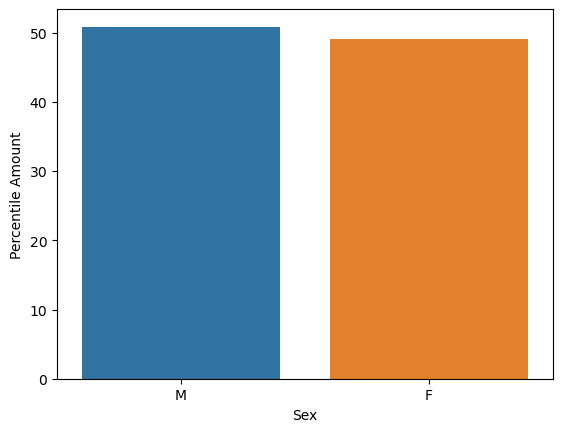

In [9]:
passengerSex = {}
for i in df["Sex"]:
    if i in passengerSex:
        passengerSex[i] += 1 / len(df) * 100
    else:
        passengerSex[i] = 1 / len(df) * 100

graph = {
    "Sex" : passengerSex.keys(),
    "Percentile Amount" : passengerSex.values()
}

graphDF = pd.DataFrame(graph)

sns.barplot(x = "Sex",
            y = "Percentile Amount",
            data = graphDF)

plt.show()

In [12]:
classes = {"P" : [0, 0], "C" : [0, 0]}

for i in range(len(df)):
    passengerClass = df.loc[i]["Category"]
    survived = df.loc[i]["Survived"]
    classes[passengerClass][survived] += 1

totalFirstClass = classes["P"][0] + classes["P"][1]
totalSecondClass = classes["C"][0] + classes["C"][1]
    
survivorData = {
    "FirstClass Died" : (classes["P"][0] / totalFirstClass) * 100, "FirstClass Lived" : (classes["P"][1] / totalFirstClass) * 100,
    "SecondClass Died" : (classes["C"][0] / totalSecondClass) * 100, "SecondClass Lived" : (classes["C"][1] / totalSecondClass) * 100,
    "Total Died" : ((classes["P"][0] + classes["C"][0]) / (totalFirstClass + totalSecondClass)) * 100, "Total Lived" : ((classes["P"][1] + classes["C"][1]) / (totalFirstClass + totalSecondClass)) * 100
}

survivorData

{'FirstClass Died': 87.68844221105527,
 'FirstClass Lived': 12.311557788944723,
 'SecondClass Died': 79.79274611398964,
 'SecondClass Lived': 20.207253886010363,
 'Total Died': 86.14762386248736,
 'Total Lived': 13.852376137512639}